In [2]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from metadata import *
from data_manager import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# test_scheme = ('normalize_mu_region_sigma_wholeImage_(-1,5)', 'no-augment')
test_scheme = ('none', 'no-augment')

In [4]:
auroc_all_structures_all_methods = defaultdict(dict)

In [5]:
auroc_all_methods_all_structures = defaultdict(dict)

In [5]:
auroc_all_classifiers_all_structures = defaultdict(dict)

for classifier_id in [893, 894, 891, 892, 890, 889]:

    auroc_all_structures = {}

    for fn in os.listdir(os.path.join(ROOT_DIR + '/assessment_results_v4')):
    #     print fn
        fp = os.path.join(ROOT_DIR + '/assessment_results_v4', fn)
        res = load_pickle(fp)

    #     if 'method' in res and res['method'] == 'cnn' and res['n_sections']['MD594']['7N'] == 99:
        if res['classifier_id'] == classifier_id:
            auroc_all_structures[res['structure']] = \
            [res['test_metrics_all_ntrain'][15000][test_scheme][trial]['auroc'] 
             for trial in range(len(res['test_metrics_all_ntrain'][15000][test_scheme]))]

    auroc_all_classifiers_all_structures[classifier_id] = auroc_all_structures

auroc_all_classifiers_all_structures.default_factory = None

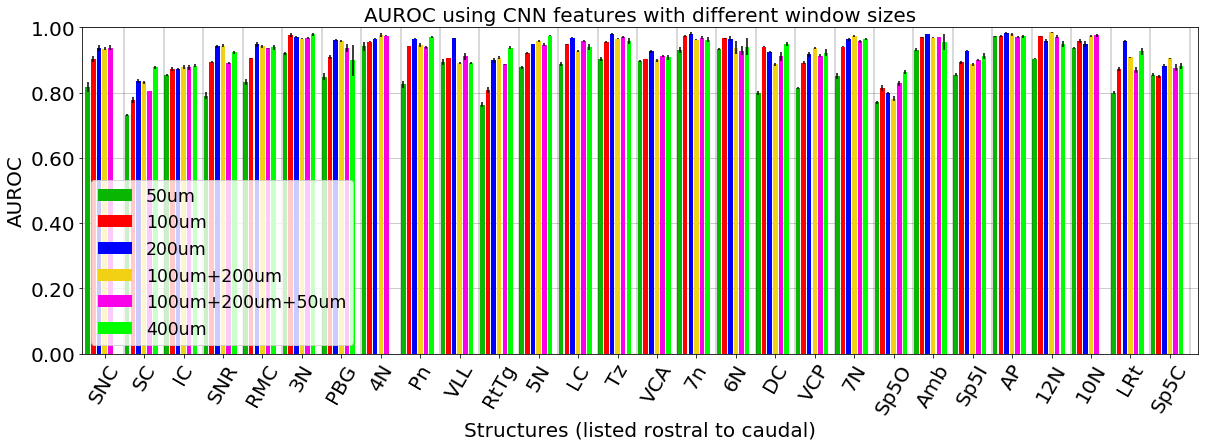

In [9]:
plot_by_method_by_structure({{893: '50um', 
                                     894: '200um', 
                                     891: '100um',
                             892: '100um+200um',
                             890: '100um+200um+50um',
                             889: '400um'}[clf_id]: 
                                    auroc_all_classifiers_all_structures[clf_id] for clf_id in [893, 894, 891, 892, 890, 889]}, 
                            stacks=['50um', '100um', '200um', '100um+200um', '100um+200um+50um', '400um'],
                           structures=structures_unsided_sorted_by_rostral_caudal_position,
                              title='AUROC using CNN features with different window sizes',
                              ylabel='AUROC',
                            xlabel='Structures (listed rostral to caudal)',
                          stack_to_color={'100um': (255,0,0), 
                                          '200um': (0,0,255), 
                                          '50um': (9,183,3),
                                         '100um+200um': (242, 208, 19),
                                         '100um+200um+50um': (249, 2, 233),
                                         '400um': (0,255,0)},
                           legend_loc='lower left',
                           legend_fontsize='xx-large');

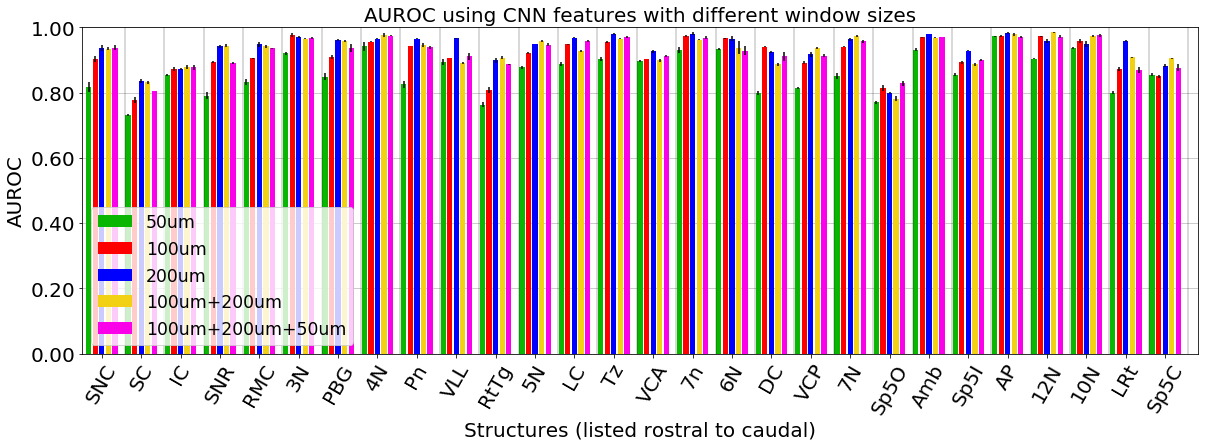

In [148]:
plot_by_method_by_structure({{893: '50um', 
                                     894: '200um', 
                                     891: '100um',
                             892: '100um+200um',
                             890: '100um+200um+50um'}[clf_id]: 
                                    auroc_all_classifiers_all_structures[clf_id] for clf_id in [893, 894, 891, 892, 890]}, 
                            stacks=['50um', '100um', '200um', '100um+200um', '100um+200um+50um'],
                           structures=structures_unsided_sorted_by_rostral_caudal_position,
                              title='AUROC using CNN features with different window sizes',
                              ylabel='AUROC',
                            xlabel='Structures (listed rostral to caudal)',
                          stack_to_color={'100um': (255,0,0), 
                                          '200um': (0,0,255), 
                                          '50um': (9,183,3),
                                         '100um+200um': (242, 208, 19),
                                         '100um+200um+50um': (249, 2, 233)},
                           legend_loc='lower left',
                           legend_fontsize='xx-large');

In [ ]:
# Only three cases: 50um, 100um, 200um

In [160]:
! mkdir /home/yuncong/BrainProjectFiguresByTopic

In [176]:
q = [[np.mean(auroc_all_classifiers_all_structures[clf_id][s], axis=-1)
     for s in structures_unsided_sorted_by_rostral_caudal_position]
for clf_id in [891, 894, 893] ]

In [180]:
print structures_unsided_sorted_by_rostral_caudal_position

['SNC', 'SC', 'IC', 'SNR', 'RMC', '3N', 'PBG', '4N', 'Pn', 'VLL', 'RtTg', '5N', 'LC', 'Tz', 'VCA', '7n', '6N', 'DC', 'VCP', '7N', 'Sp5O', 'Amb', 'Sp5I', 'AP', '12N', '10N', 'LRt', 'Sp5C']


In [177]:
q

[[0.9043085317460319,
  0.7774936666666665,
  0.8722178333333331,
  0.8938141666666667,
  0.9047848180677541,
  0.9768232866881953,
  0.9088861386138612,
  0.9563770226537217,
  0.9429663333333332,
  0.9060995000000002,
  0.8078836666666666,
  0.9222506666666667,
  0.947597,
  0.9550875968992248,
  0.9028956666666667,
  0.9731103936039361,
  0.9669093567251462,
  0.9403396653098146,
  0.8919815,
  0.9409313333333333,
  0.814679,
  0.9701672043010752,
  0.8926598333333334,
  0.9742221102150537,
  0.9723581666666666,
  0.9578591160220995,
  0.8730436666666667,
  0.8497470000000001],
 [0.9375579710144928,
  0.8348603333333333,
  0.8727899999999998,
  0.9419998333333331,
  0.94781247225921,
  0.9693359253499224,
  0.9619208103130757,
  0.965623188405797,
  0.9654455000000001,
  0.9665396666666667,
  0.8985183333333332,
  0.9499786666666665,
  0.9683073661897189,
  0.980121875,
  0.9260445,
  0.9811335656213706,
  0.9658802083333332,
  0.9256830000000001,
  0.9170621666666667,
  0.963200000

In [178]:
np.savetxt('/home/yuncong/BrainProjectFiguresByTopic/auroc_all_classifiers_all_structures_simple.txt',
           q)

In [161]:
save_json(auroc_all_classifiers_all_structures, 
          '/home/yuncong/BrainProjectFiguresByTopic/auroc_all_classifiers_all_structures.json')

In [14]:
auroc_all_classifiers_all_structures = \
load_json('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Classification/metrics/auroc_all_classifiers_all_structures.json')

In [19]:
auroc_all_classifiers_all_structures = {int(k): v for k, v in auroc_all_classifiers_all_structures.iteritems()}

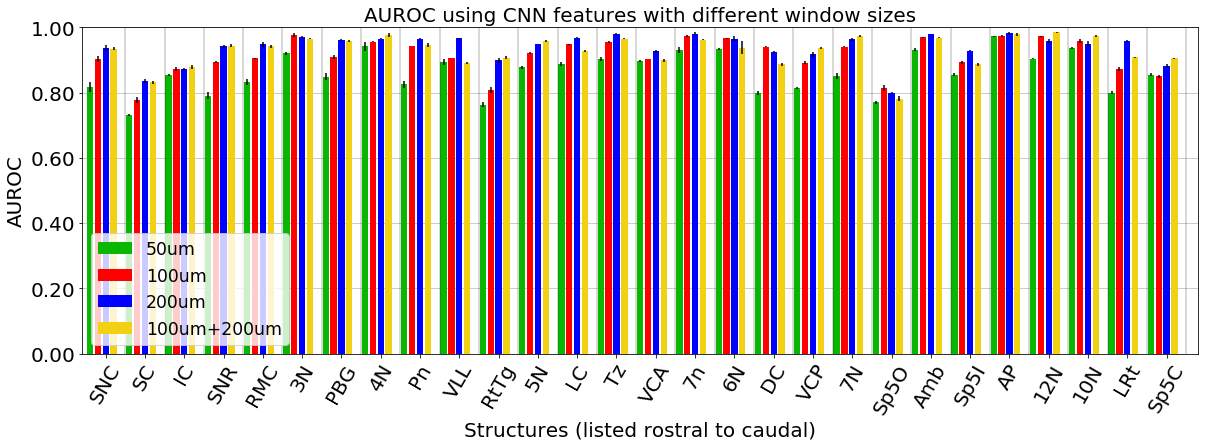

In [20]:
plot_by_method_by_structure({{893: '50um', 
                                     894: '200um', 
                                     891: '100um',
                              892: '100um+200um'}[clf_id]: 
                                    auroc_all_classifiers_all_structures[clf_id] for clf_id in [893, 894, 891, 892]}, 
                            stacks=['50um', '100um', '200um',  '100um+200um'],
                           structures=structures_unsided_sorted_by_rostral_caudal_position,
                              title='AUROC using CNN features with different window sizes',
                              ylabel='AUROC',
                            xlabel='Structures (listed rostral to caudal)',
                          stack_to_color={'100um': (255,0,0), 
                                          '200um': (0,0,255), 
                                          '50um': (9,183,3),
                                          '100um+200um': (242, 208, 19),
                                         },
                           legend_loc='lower left',
                           legend_fontsize='xx-large');

In [8]:
auroc_all_classifiers_all_structures = \
np.loadtxt('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Classification/metrics/auroc_all_classifiers_all_structures_simple.txt')

In [12]:
auroc_all_classifiers_all_structures = {
    891: dict(zip(structures_unsided_sorted_by_rostral_caudal_position, auroc_all_classifiers_all_structures[0])),
    894: dict(zip(structures_unsided_sorted_by_rostral_caudal_position, auroc_all_classifiers_all_structures[1])),
    893: dict(zip(structures_unsided_sorted_by_rostral_caudal_position, auroc_all_classifiers_all_structures[2])),
}

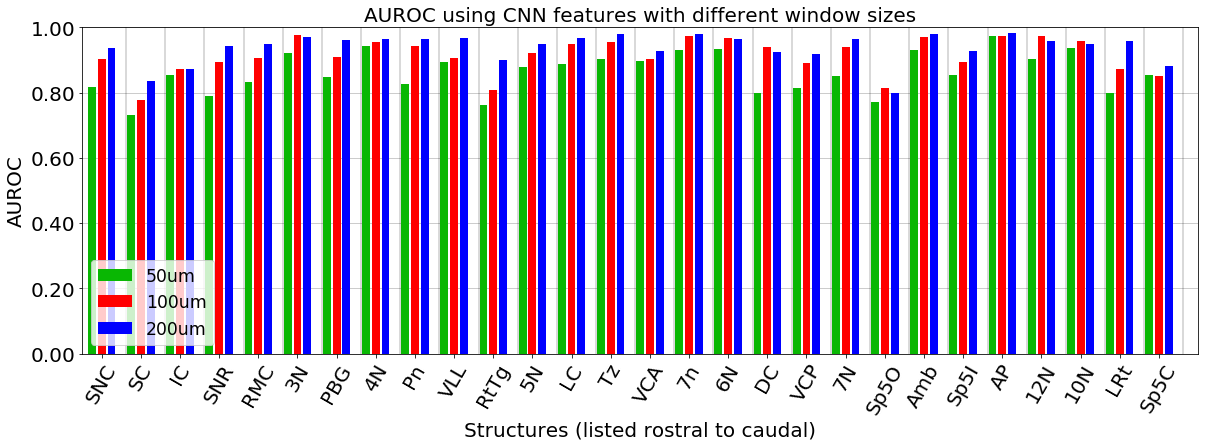

In [13]:
plot_by_method_by_structure({{893: '50um', 
                                     894: '200um', 
                                     891: '100um'}[clf_id]: 
                                    auroc_all_classifiers_all_structures[clf_id] for clf_id in [893, 894, 891]}, 
                            stacks=['50um', '100um', '200um'],
                           structures=structures_unsided_sorted_by_rostral_caudal_position,
                              title='AUROC using CNN features with different window sizes',
                              ylabel='AUROC',
                            xlabel='Structures (listed rostral to caudal)',
                          stack_to_color={'100um': (255,0,0), 
                                          '200um': (0,0,255), 
                                          '50um': (9,183,3),
                                         },
                           legend_loc='lower left',
                           legend_fontsize='xx-large');

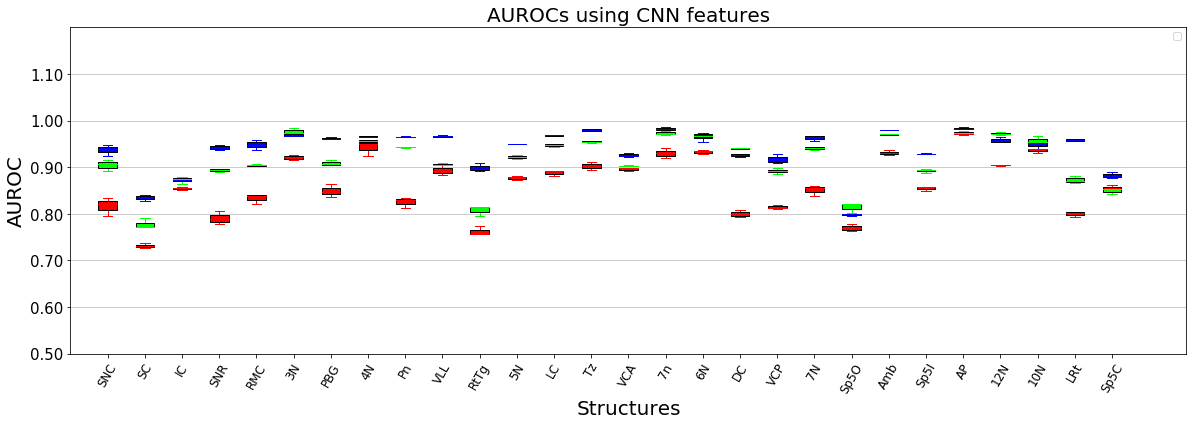

In [105]:
plot_by_stack_by_structure({{893: '100', 
                                     894: '200', 
                                     891: '50'}[clf_id]: 
                                    auroc_all_classifiers_all_structures[clf_id] for clf_id in [893, 894, 891]}, 
                           structures=structures_unsided_sorted_by_rostral_caudal_position,
                              style='boxplot2', 
                               yticks=np.arange(0.5, 1.1, 0.1),
                              title='AUROCs using CNN features',
                              ylabel='AUROC',
                          stack_to_color={'100': (255,0,0), 
                                          '200': (0,0,255), 
                                          '50': (0,255,0)});

In [72]:
auroc_all_structures = {}

for fn in os.listdir(os.path.join(ROOT_DIR + '/assessment_results_v4')):
#     print fn
    fp = os.path.join(ROOT_DIR + '/assessment_results_v4', fn)
    res = load_pickle(fp)
    
#     if 'method' in res and res['method'] == 'cnn' and res['n_sections']['MD594']['7N'] == 99:
    auroc_all_structures[res['structure']] = [res['test_metrics_all_ntrain'][15000][test_scheme][trial]['auroc'] for trial in range(len(res['test_metrics_all_ntrain'][15000][test_scheme]))]

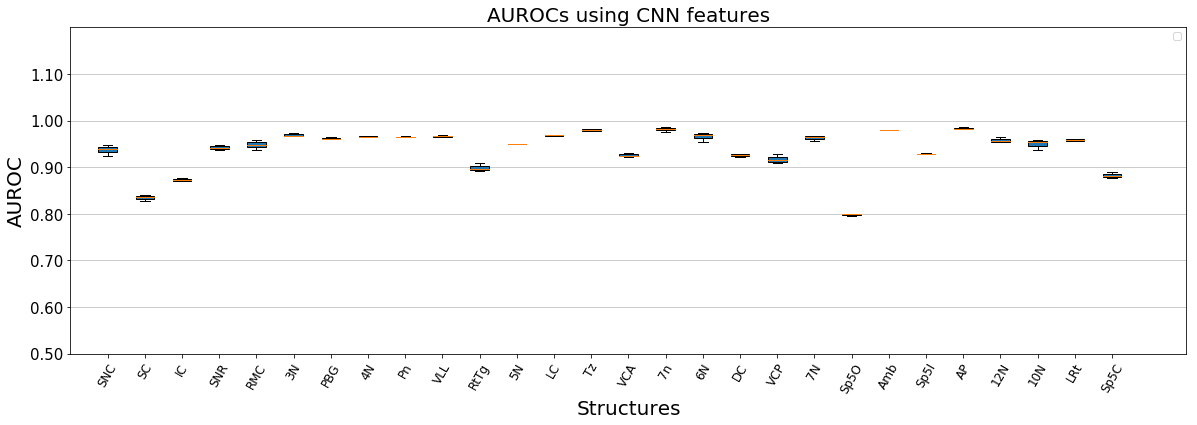

In [56]:
plot_by_stack_by_structure({'MD594': auroc_all_structures}, 
                           structures=structures_unsided_sorted_by_rostral_caudal_position,
                              style='boxplot2', 
                               yticks=np.arange(0.5, 1.1, 0.1),
                              title='AUROCs using CNN features',
                              ylabel='AUROC')

for s, scores in auroc_all_structures.iteritems():
    auroc_all_structures_all_methods[s]['cnn'] = scores
    
auroc_all_methods_all_structures['cnn'] = auroc_all_structures

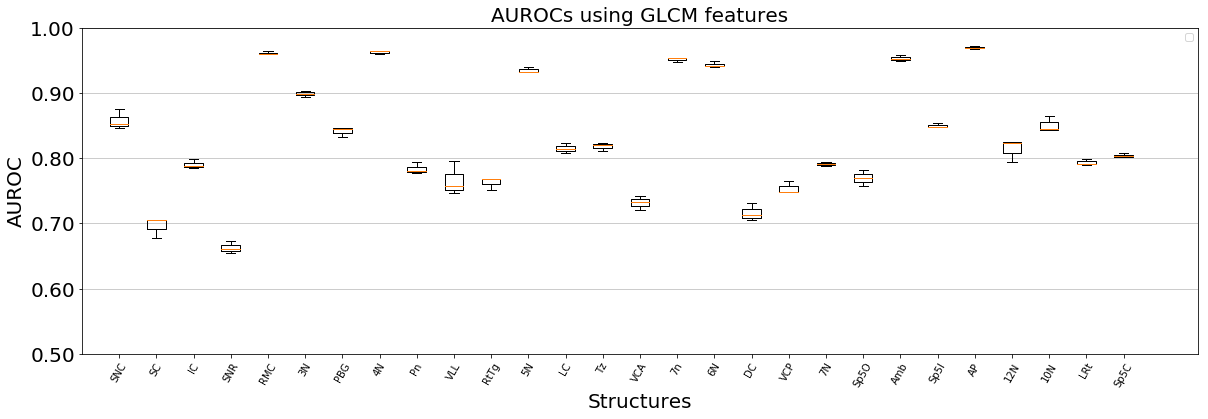

In [79]:
auroc_all_structures = {}

for fn in os.listdir(os.path.join(ROOT_DIR + '/assessment_results_v3')):
#     print fn
    fp = os.path.join(ROOT_DIR + '/assessment_results_v3', fn)
    res = load_pickle(fp)
    
    if 'method' in res and res['method'] == 'glcm':
        auroc_all_structures[res['structure']] = [res['test_metrics_all_ntrain'][15000][test_scheme][trial]['auroc'] for trial in range(len(res['test_metrics_all_ntrain'][15000][test_scheme]))]
        
        
plot_by_stack_by_structure({'MD594': auroc_all_structures}, 
                           structures=structures_unsided_sorted_by_rostral_caudal_position,
                              style='boxplot', 
                               ylim=[0.5, 1], yspacing=0.1,
                              title='AUROCs using GLCM features',
                              ylabel='AUROC')

for s, scores in auroc_all_structures.iteritems():
    auroc_all_structures_all_methods[s]['glcm'] = scores
    
auroc_all_methods_all_structures['glcm'] = auroc_all_structures

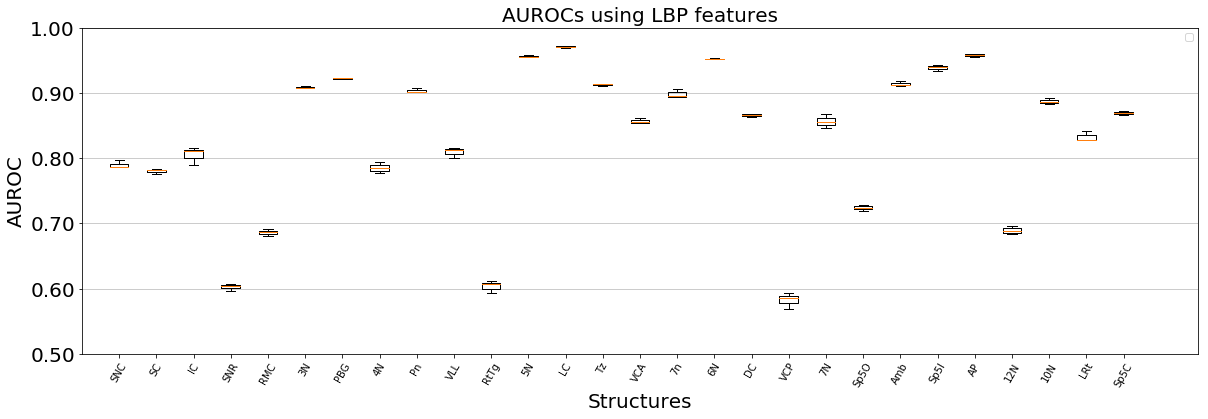

In [80]:
auroc_all_structures = {}

for fn in os.listdir(os.path.join(ROOT_DIR + '/assessment_results_v3')):
#     print fn
    fp = os.path.join(ROOT_DIR + '/assessment_results_v3', fn)
    res = load_pickle(fp)
    
    if 'structure' in res and 'method' not in res:
        auroc_all_structures[res['structure']] = [res['test_metrics_all_ntrain'][15000][test_scheme][trial]['auroc'] for trial in range(len(res['test_metrics_all_ntrain'][15000][test_scheme]))]
        
plot_by_stack_by_structure({'MD594': auroc_all_structures}, 
                           structures=structures_unsided_sorted_by_rostral_caudal_position,
                              style='boxplot', 
                               ylim=[0.5, 1], yspacing=0.1,
                              title='AUROCs using LBP features',
                              ylabel='AUROC')

for s, scores in auroc_all_structures.iteritems():
    auroc_all_structures_all_methods[s]['lbp'] = scores
    
auroc_all_methods_all_structures['lbp'] = auroc_all_structures

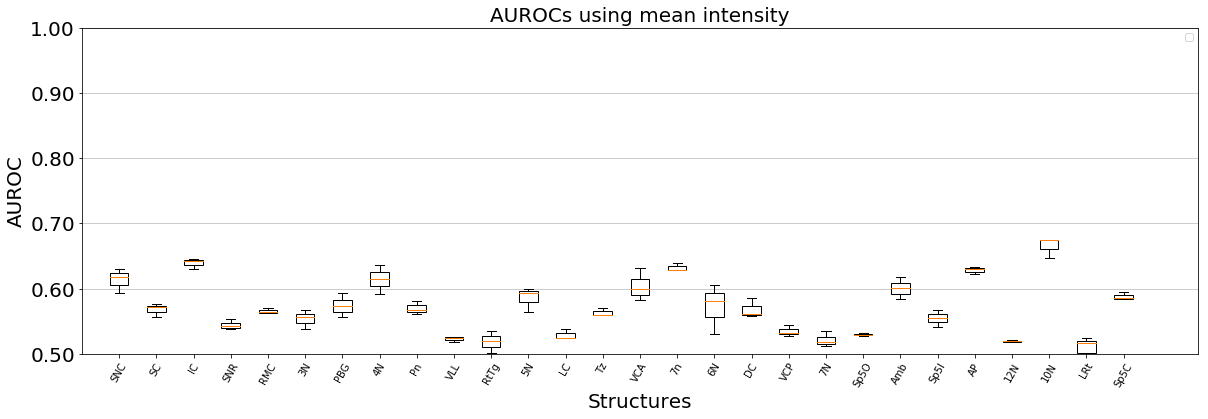

In [179]:
auroc_all_structures = {}

for fn in os.listdir(os.path.join(ROOT_DIR + '/assessment_results_v3')):
#     print fn
    fp = os.path.join(ROOT_DIR + '/assessment_results_v3', fn)
    res = load_pickle(fp)
    
    if 'method' in res and res['method'] == 'mean_intensity':
        auroc_all_structures[res['structure']] = [res['test_metrics_all_ntrain'][15000][test_scheme][trial]['auroc'] for trial in range(len(res['test_metrics_all_ntrain'][15000][test_scheme]))]
        
        
plot_by_stack_by_structure({'MD594': auroc_all_structures}, 
                           structures=structures_unsided_sorted_by_rostral_caudal_position,
                              style='boxplot', 
                               ylim=[0.5, 1], yspacing=0.1,
                              title='AUROCs using mean intensity',
                              ylabel='AUROC', stack_to_color={'MD594':(255,255,255)})

for s, scores in auroc_all_structures.iteritems():
    auroc_all_structures_all_methods[s]['meangrey'] = scores
    
auroc_all_methods_all_structures['meangrey'] = auroc_all_structures

In [174]:
np.median(auroc_all_methods_all_structures['cnn'].values())

0.94764325

In [81]:
auroc_all_structures_all_methods.default_factory = None
auroc_all_methods_all_structures.default_factory = None

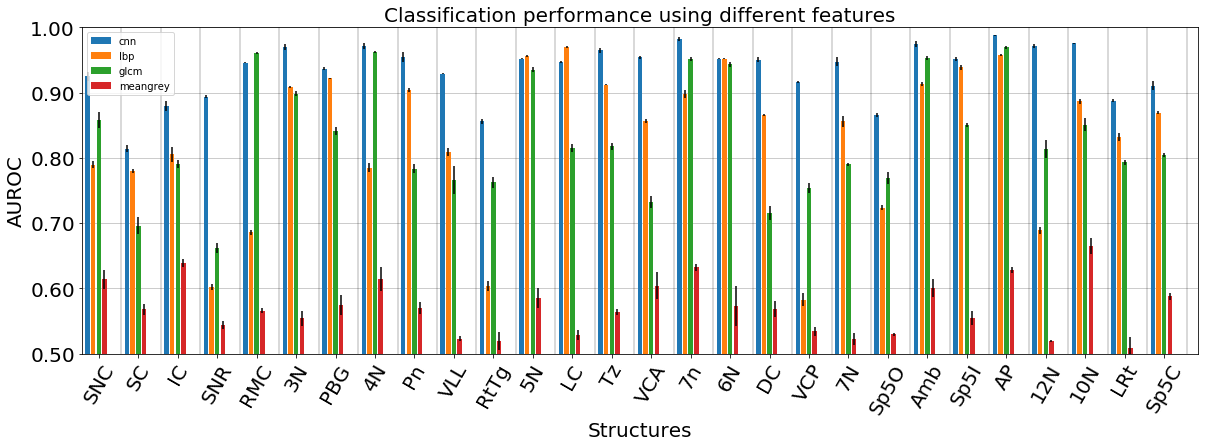

In [181]:
plot_by_method_by_structure(auroc_all_methods_all_structures,
                           structures=structures_unsided_sorted_by_rostral_caudal_position,
                            stacks=['cnn', 'lbp', 'glcm', 'meangrey'],
                              style='boxplot', 
                               ylim=[0.5, 1], yspacing=0.1,
                              title='Classification performance using different features',
                              ylabel='AUROC',
                          stack_to_color={'cnn':(255,0,0), 'lbp':(0,0,255), 'glcm':(0,255,0)},
                           spacing_btw_stacks=2)

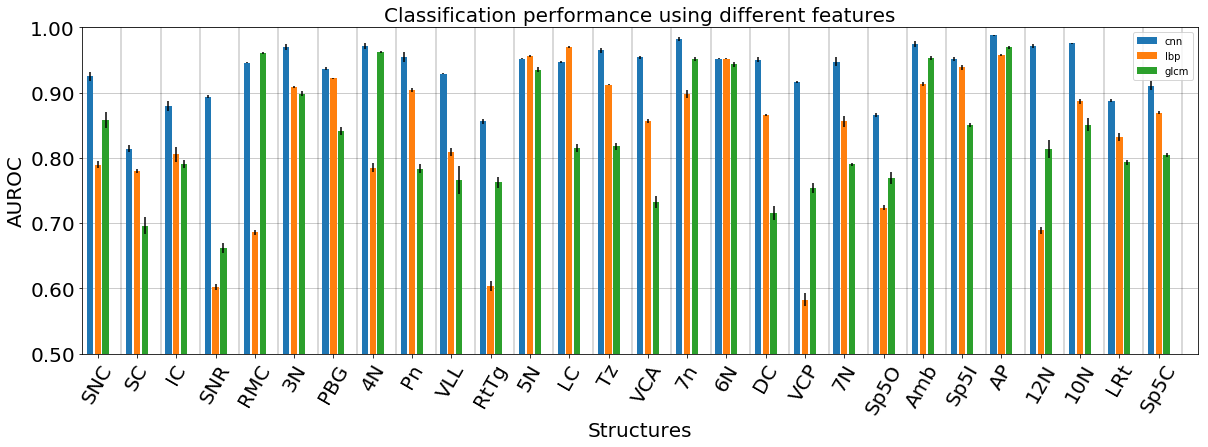

In [169]:
plot_by_method_by_structure(auroc_all_methods_all_structures,
                           structures=structures_unsided_sorted_by_rostral_caudal_position,
                            stacks=['cnn', 'lbp', 'glcm'],
                              style='boxplot', 
                               ylim=[0.5, 1], yspacing=0.1,
                              title='Classification performance using different features',
                              ylabel='AUROC',
                          stack_to_color={'cnn':(255,0,0), 'lbp':(0,0,255), 'glcm':(0,255,0)},
                           spacing_btw_stacks=2)

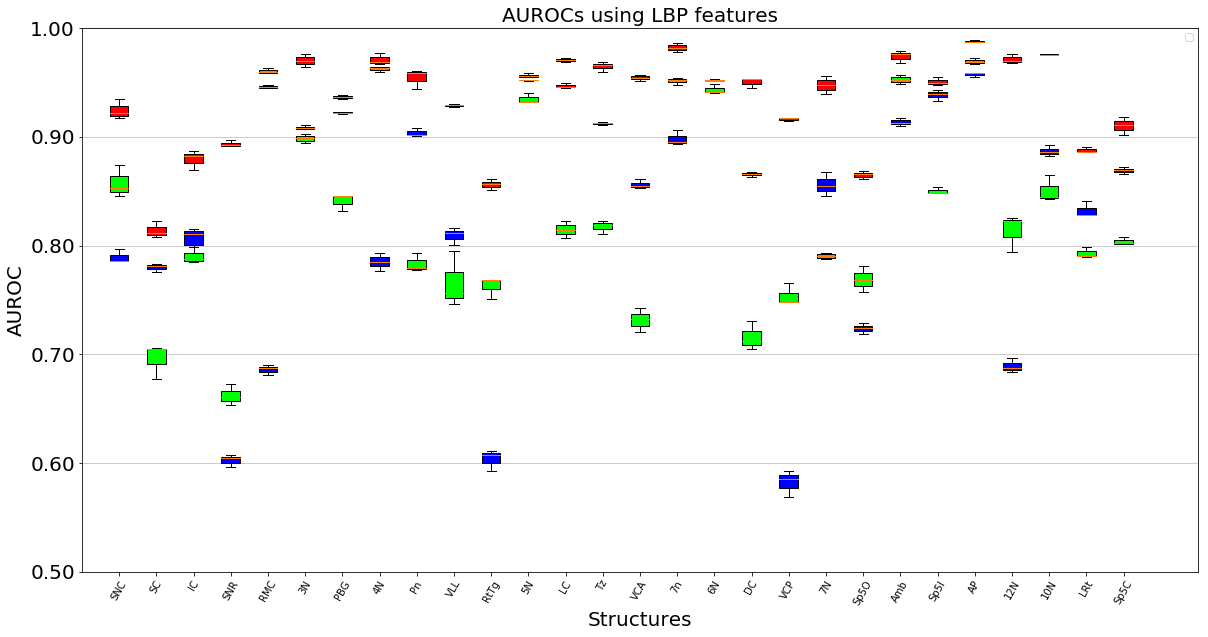

In [90]:
plot_by_stack_by_structure(auroc_all_methods_all_structures,
                           structures=structures_unsided_sorted_by_rostral_caudal_position,
                              style='boxplot', 
                               ylim=[0.5, 1], yspacing=0.1,
                              title='AUROCs using LBP features',
                              ylabel='AUROC',
                          stack_to_color={'cnn':(255,0,0), 'lbp':(0,0,255), 'glcm':(0,255,0)},
                          figsize=(20,10))

In [4]:
for fn in os.listdir(os.path.join(ROOT_DIR + '/assessment_results_v2')):
#     print fn
    fp = os.path.join(ROOT_DIR + '/assessment_results_v2', fn)
    res = load_pickle(fp)
    
    if res['train_stack'] == 'MD589':
#     if res['train_stack'] == 'MD589' and res['test_stack'] == 'MD594':
#     if res['train_stack'] in all_nissl_stacks and \
#     (res['test_stack'] in all_alt_nissl_ntb_stacks):
#     if res['test_stack'] == 'ChatCryoJane201710':
#     if res['test_stack'] == 'MD661':
    
        print 'train: %s, %s sections, %s, %s' % (res['train_stack'], res['n_train_sections'], res['train_scheme'], res['train_stain'] if 'train_stain' in res else '')
        print 'test: %s, %s sections, %s, %s' % (res['test_stack'], res['n_test_sections'], res['test_scheme'], res['test_stain'] if 'test_stain' in res else '')

    #         plot_result_wrt_ntrain(extract_one_metric(res['test_metrics_all_ntrain'], 'auroc'), ylabel='Area under ROC')
    #     plot_result_wrt_ntrain(extract_one_metric(res['test_metrics_all_ntrain'], 'acc', 0.5), ylabel='Test accuracy @ 0.5 threshold')

    #     plot_roc_curve(res['test_metrics_all_ntrain'][1000][('normalize_mu_region_sigma_wholeImage_(-1,5)',
    #               'augment')][0]['fp'], 
    #                res['test_metrics_all_ntrain'][1000][('normalize_mu_region_sigma_wholeImage_(-1,5)',
    #               'augment')][0]['tp'], 
    #               res['test_metrics_all_ntrain'][1000][('normalize_mu_region_sigma_wholeImage_(-1,5)',
    #               'augment')][0]['opt_thresh']);
 
        for test_scheme in res['test_metrics_all_ntrain'][1000].keys():
#             print test_scheme, res['test_metrics_all_ntrain'][1000][test_scheme][0]['acc'][0.5]
            print test_scheme, 'auroc =',res['test_metrics_all_ntrain'][1000][test_scheme][0]['auroc']
        print

train: MD589, {'MD589': 10} sections, normalize_mu_region_sigma_wholeImage_(-1,5), {'MD589': 'A'}
test: MD661, {'MD661': 10} sections, normalize_mu_region_sigma_wholeImage_(-1,5), {'MD661': 'A'}
('normalize_mu_region_sigma_wholeImage_(-1,5)', 'no-augment') auroc = 0.6911214999999999
('normalize_mu_region_sigma_wholeImage_(-1,5)', 'augment') auroc = 0.6208809999999999

train: MD589, {'MD589': 10} sections, none, {'MD589': 'A'}
test: MD642, {'MD642': 10} sections, none, {'MD642': 'N'}
('none', 'no-augment') auroc = 0.8334915000000002
('none', 'augment') auroc = 0.7142865

train: MD589, 10 sections, normalize_mu_region_sigma_wholeImage_(-1,5), 
test: ChatCryoJane201710, 10 sections, normalize_mu_region_sigma_wholeImage_(-1,5), 
('normalize_mu_region_sigma_wholeImage_(-1,5)', 'no-augment') auroc = 0.577557
('normalize_mu_region_sigma_wholeImage_(-1,5)', 'augment') auroc = 0.6410799999999998

train: MD589, 10 sections, normalize_mu_region_sigma_wholeImage_(-1,5), 
test: MD594, 10 sections, 

In [ ]:
for fn in os.listdir(os.path.join(ROOT_DIR + '/assessment_results')):
    fp = os.path.join(ROOT_DIR + '/assessment_results', fn)
    res = load_pickle(fp)
    
    if res['train_stack'] == 'MD589' and res['test_stack'] == 'MD661':
#     if res['train_stack'] == 'MD661' and res['test_stack'] == 'ChatCryoJane201710':
    
        print 'train: %s, %d sections, %s' % (res['train_stack'], res['n_train_sections'], res['train_scheme'])
        print 'test: %s, %d sections, %s' % (res['test_stack'], res['n_test_sections'], res['test_scheme'])
        if 'test_auroc_all_ntrain' in res:
            plot_result_wrt_ntrain(res['test_auroc_all_ntrain'], ylabel='Area under ROC')
        if 'test_accs05_all_ntrain' in res:
            plot_result_wrt_ntrain(res['test_accs05_all_ntrain'], ylabel='Test accuracy')